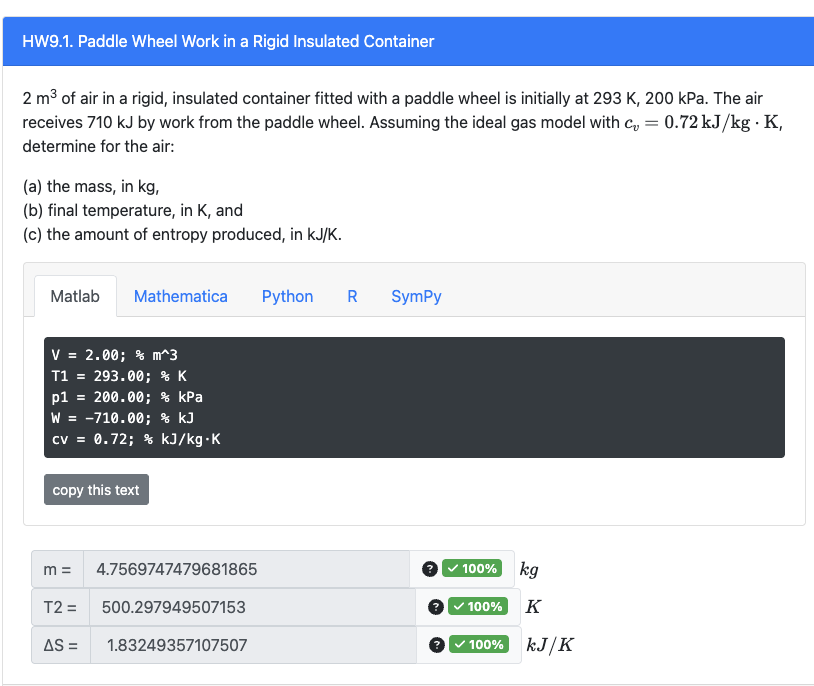

In [1]:
# 9.1
# 这道题希望我们用dertaU=cv*m*(T2-T1)因为我们不知道T2 所以不知道u2 但是其实我们可以用T2 表示u2然后解出来T2，但是cv也行吧


from sympy import *

V = 2.00 # m^3
T1 = 293.00 # K
p1 = 200.00 # kPa

W = -710.00 # kJ
cv = 0.72 # kJ/（kg·K）

# 注意这个单位
R=8314/28.97 # J/。。
W=W # KJ
cv=cv # KJ/kg·K

p1=p1*1e3


m=p1*V/R/T1
print('m',m)
dertaU=-W

T2=dertaU/cv/m+T1
print('T2',T2)

dertaS = m * cv * ln(T2 / T1)

print('dertaS',dertaS)


m 4.7569747479681865
T2 500.297949507153
dertaS 1.83249357107507


In [20]:
import math

# 已知参数
V = 2.00  # 体积，单位：m^3
T1 = 293.00  # 初始温度，单位：K
P1 = 200.00  # 初始压力，单位：kPa
W = -710.00  # 桨轮功，单位：kJ
cv = 0.72  # 定容比热容，单位：kJ/kg·K
R = 0.287  # 空气的气体常数，单位：kJ/kg·K

# 计算质量
m = (P1 * V) / (R * T1)



# 计算最终温度
T2 = T1 - W / (m * cv)

# 计算熵产
delta_S = m * cv * math.log(T2 / T1)

print(f"质量 m = {m:.2f} kg")
print(f"最终温度 T2 = {T2:.2f} K")
print(f"熵产 ΔS = {delta_S:.2f} kJ/K")

质量 m = 4.76 kg
最终温度 T2 = 500.31 K
熵产 ΔS = 1.83 kJ/K


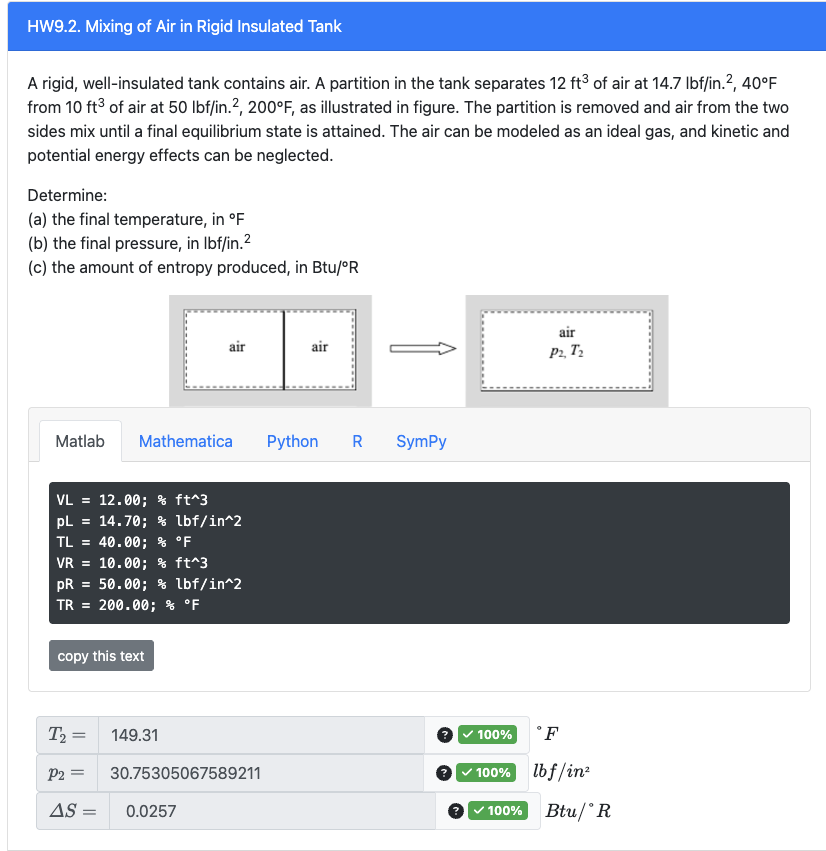

In [ ]:
# 9.2
# 首先用m=p*v/Rbar/T得到两个部分的 m
# 其实就是m1 u1 m2 u2 两个物质变成一个完整的mtotal utotal 然后读表得到T 
# 最后dertaS=integrate(Q/T)+sigma但是因为没有Q，所以变成sigma=dertaS
# dertaS=ml*(s2-sl-Rln(p2/pl))


R=1545/28.97 # (ft/lbf)/(lb*R)
# R = 53.35  # ft·lbf/(lbm·°R)


from sympy import *

VL = 12.00 # ft^3
pL = 14.70 # lbf/in^2
TL = 40.00 # °F
VR = 10.00 # ft^3
pR = 50.00 # lbf/in^2
TR = 200.00 # °F
################################

pl=pL;pr=pR;Vr=VR;Vl=VL

Tl=TL+460 #R # 500
Tr=TR+460 #R # 660

ul=85.2 # btu/lb
sl=0.58233 # btu/lb*R
ur=112.67
sr=0.64902 # btu/lb*R



rate=1/144 # 1ft/144in**2

ml=pl*Vl/R/Tl/rate
mr=pr*Vr/R/Tr/rate

mtotal=ml+mr
utotal=ml*ul+mr*ur
u2=utotal/mtotal
# print(u2) # 103.94194921730016


T2=(u2-102.34)/(105.78-102.34)*(620-600)+600
print('T2',T2-460)

p2=mtotal/(Vl+Vr)*R*T2

p2=p2*rate
print('p2',p2)

s2=(u2-102.34)/(105.78-102.34)*(0.63395-0.62607)+0.62607

rate2=1/778 # *1btu/778ft*lbf

dertaS=ml*(s2-sl-rate2*R*ln(p2/pl))+mr*(s2-sr-rate2*R*ln(p2/pr))

print('sigma',dertaS)

T2 149.31365824011732
p2 30.75305067589211
sigma 0.0256745379277198


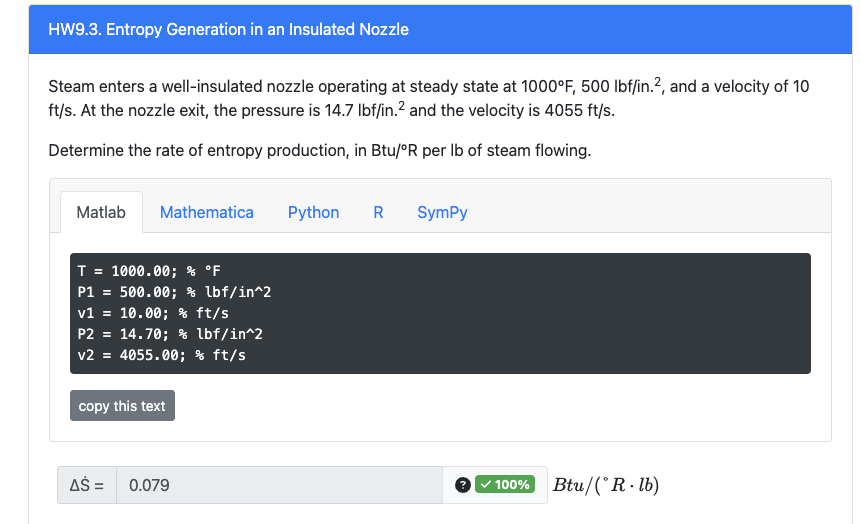

In [3]:
# 9.3

# 热力学第一定律
# 0=Q(=0)-W(=0)+m_dot(h1-h2+v1**2/2-v2**2/2)得到h2

# 查表p=14.7 h2 得到s2
# 热力学第二定律
# m_dot*(s2-s1)=integrate(Q/T)(=0)+sigma得到sigma/m_dot


from sympy import *

T = 1000.00 # °F
P1 = 500.00 # lbf/in^2
v1 = 10.00 # ft/s
P2 = 14.70 # lbf/in^2
v2 = 4055.00 # ft/s

h1=1520.7
s1=1.7371

rate1=1/32.2 #lbf/(lb*ft)

rate2=1/778  #1btu/778 ft*lbf
h2=h1+rate1*rate2*(v1**2-v2**2)/2

# print(h2)  1192.5188658608633 基本就是T=300 F温度的时候
s2=1.8157
sigma_mdot=s2-s1
print('sigma_dot',sigma_mdot)




sigma_dot 0.0786


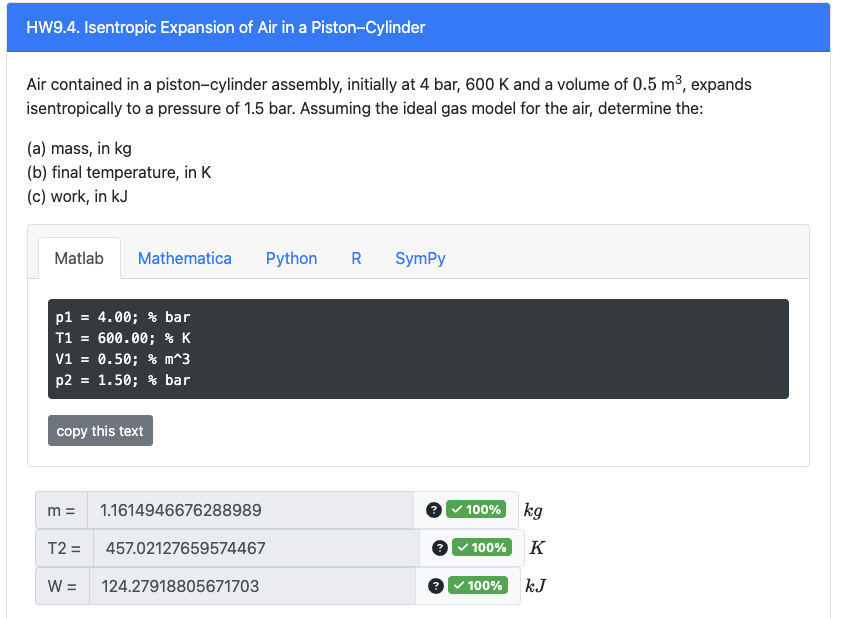

In [4]:
# 9.4
# 这个题v2是改变的，但是没事，只改了m和W


# 这个题需要用到一个新的数据，在A22中，dertas=0时的pr可以使用的公式是
# 如果已知pr1，用pr2/pr1=p2/p1找到对应pr2，进而找到对应的所有数据
# 然后Q=0,W=-U
from sympy import *

p1 = 4.00 # bar
T1 = 600.00 # K
V1 = 0.5 # m^3
p2 = 1.50 # bar
##############################
# 先读第一个位置的表

u1=434.78
pr1=16.28


R=8314/28.97 #Nm/kg/K


p1=p1*1e5
p2=p2*1e5

m=p1*V1/R/T1
print('m',m)


pr2=pr1*p2/p1
# print(pr2) 6.105

T2=(pr2-5.775)/(6.245-5.775)*(460-450)+450
print('T2',T2)
u2=(pr2-5.775)/(6.245-5.775)*(329.97-322.62)+322.62


W=-m*(u2-u1)
print('W',W)



m 1.1614946676288989
T2 457.02127659574467
W 124.27918805671703
